###Part 3 - Very basic Exploratory Data Analysis and Visualization


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import openai



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_pickle('BeatlesSongsQCd.pkl')
df.columns


Index(['song', 'core_catalogue_releases', 'songwriters', 'lead_vocals', 'year',
       'SongKey', 'first_release_date', 'max_key', 'mode', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_tempo',
       'avg_duration_ms', 'avg_time_signature', 'Song_y', 'lyrics',
       'avg_popularity', 'BB_name', 'BB_artist', 'BB_debut_date',
       'BB_peak_position', 'BB_peak_date', 'BB_weeks_on_chart',
       'RollingStonePosition', 'Top20_x', 'Next30_x', 'Bottom20_x',
       'RobSegment', 'Top20_y', 'Next30_y', 'Bottom20_y', 'LauraSegment',
       'Top20_x', 'Next30_x', 'Bottom20_x', 'EmilySegment', 'Top20_y',
       'Next30_y', 'Bottom20_y', 'OliviaSegment', 'Top20_x', 'Next30_x',
       'Bottom20_x', 'BrianSegment', 'Top20_y', 'Next30_y', 'Bottom20_y',
       'JackieSegment', 'Canonical_album', 'Year_y', 'first_vocalist',
       'Paul_Song', 'John_Song', 'George_Song', 'Ringo_Song',

In [4]:
df.shape

(198, 63)

In [5]:
print(df['BB_debut_date'])

0            NaT
1     1965-09-25
2            NaT
3     1964-03-28
4            NaT
5     1967-07-22
6     1964-07-25
7            NaT
8            NaT
9            NaT
10           NaT
11           NaT
12    1995-04-22
13    1967-07-29
14           NaT
15           NaT
17    1969-06-14
18           NaT
19           NaT
20           NaT
21           NaT
22           NaT
23           NaT
24    1964-03-28
25           NaT
26           NaT
27           NaT
28           NaT
29           NaT
30           NaT
31    1965-12-18
32           NaT
33           NaT
34           NaT
35           NaT
37    1964-03-28
38           NaT
39           NaT
40    1969-05-10
41           NaT
42           NaT
43    1965-02-20
44    1966-08-27
45           NaT
46           NaT
47           NaT
48           NaT
49           NaT
51           NaT
52           NaT
53           NaT
54    1964-03-07
55    1969-05-10
56           NaT
57           NaT
58           NaT
59           NaT
60           NaT
61           N

In [6]:
df.dtypes

song                               object
core_catalogue_releases            object
songwriters                        object
lead_vocals                        object
year                               object
SongKey                            object
first_release_date         datetime64[ns]
max_key                           float64
mode                              float64
avg_danceability                  float64
avg_energy                        float64
avg_loudness                      float64
avg_speechiness                   float64
avg_acousticness                  float64
avg_instrumentalness              float64
avg_liveness                      float64
avg_valence                       float64
avg_tempo                         float64
avg_duration_ms                   float64
avg_time_signature                float64
Song_y                             object
lyrics                             object
avg_popularity                    float64
BB_name                           

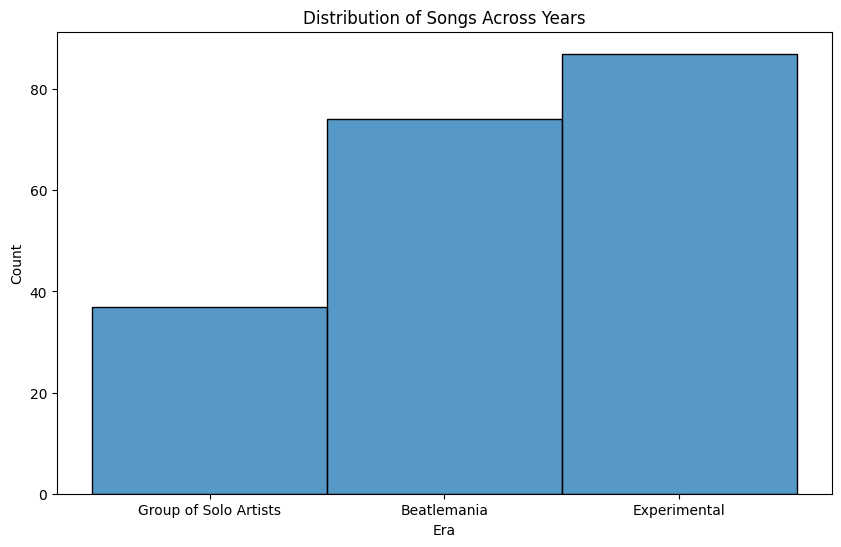

In [7]:
# Some basic Data visualization

# Distribution of songs across Eras
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Era', bins=9)
plt.title('Distribution of Songs Across Years')
plt.xlabel('Era')
plt.ylabel('Count')
plt.show()



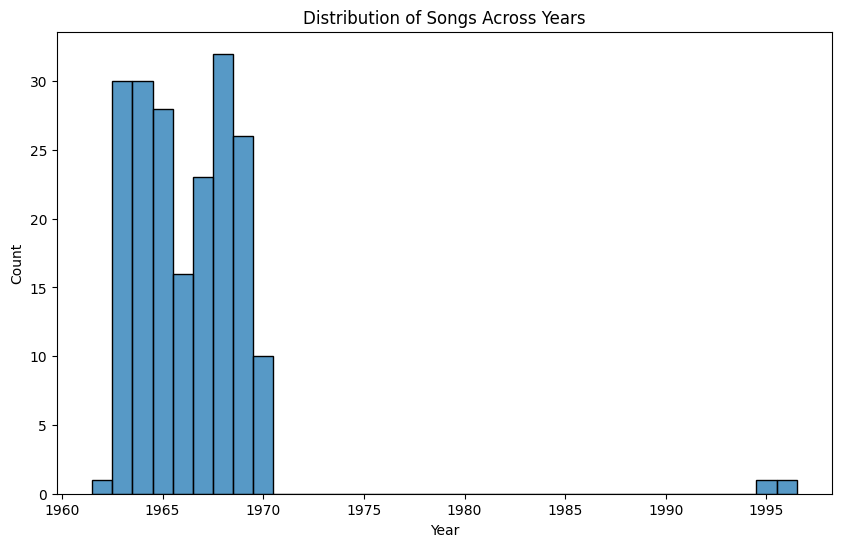

In [8]:


# Distribution of songs across years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=9)
plt.title('Distribution of Songs Across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()





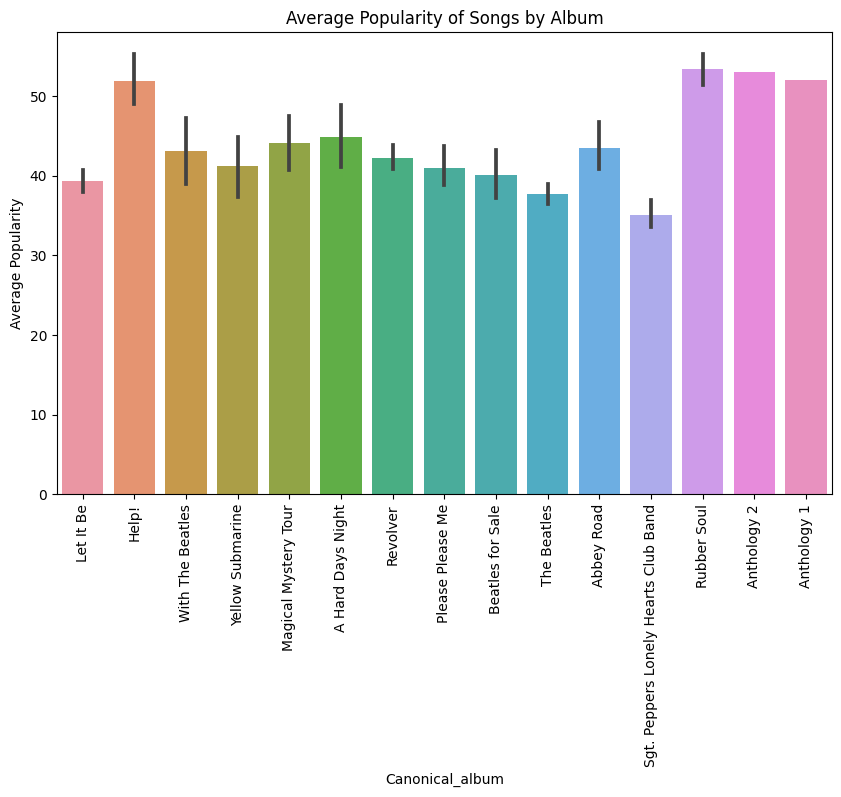

In [9]:
# Average popularity of songs by canonical album
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Canonical_album', y='avg_popularity')
plt.title('Average Popularity of Songs by Album')
plt.xlabel('Canonical_album')
plt.ylabel('Average Popularity')
plt.xticks(rotation='vertical')  # this line makes x-labels appear diagonally
plt.show()

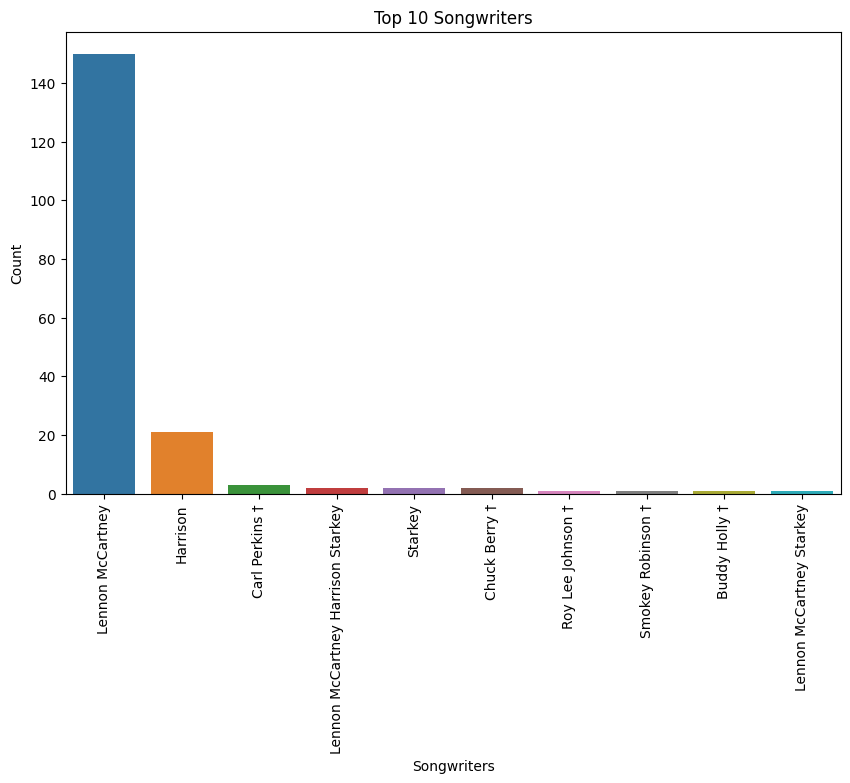

In [10]:
# Top songwriters
top_songwriters = df['songwriters'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songwriters.index, y=top_songwriters.values)
plt.title('Top 10 Songwriters')
plt.xlabel('Songwriters')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



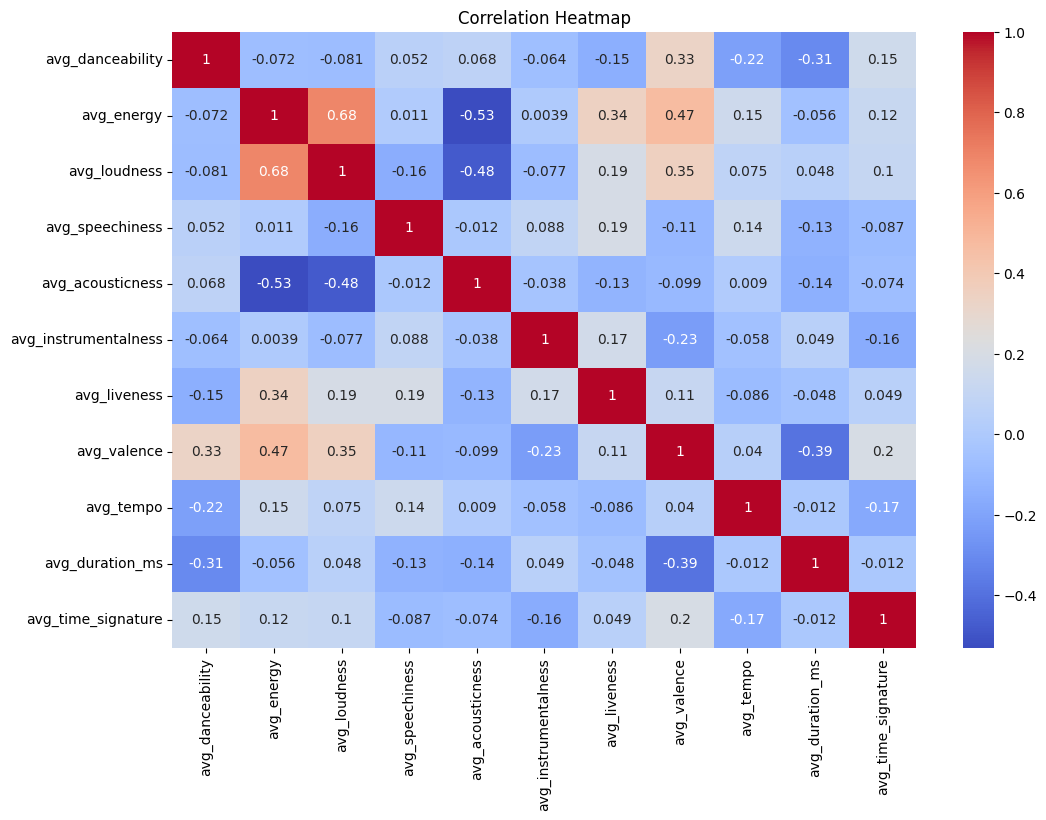

In [11]:
# Subset dataframe to include only columns between 'avg_danceability' and 'avg_time_signature'
df_subset = df.loc[:, 'avg_danceability':'avg_time_signature']

# Calculate correlation on the subset dataframe
correlation = df_subset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

These look really good. I see a couple correlations that might incidate multicolearity issues with regressions I plan to do later

Potentially problematic strong positive correlations between: (avg_loudness:avg_energy) and (avg_valence:avg_energy)
Potentially problematic strong negative correlations between: (Avg_acousticness:Avg_energy) and (avg_acousticness:avg_loudness) 

In [12]:
##Stem: Categorical Variable Analysis

for col in ['songwriters', 'lead_vocals', 'BB_artist', 'RobSegment', 'LauraSegment', 'Canonical_album']:
    print(df[col].value_counts())





Lennon McCartney                                         150
Harrison                                                  21
Carl Perkins †                                             3
Lennon McCartney Harrison Starkey                          2
Starkey                                                    2
Chuck Berry †                                              2
Roy Lee Johnson †                                          1
Smokey Robinson †                                          1
Buddy Holly †                                              1
Lennon McCartney Starkey                                   1
Phil Medley Bert Berns †                                   1
Meredith Willson †                                         1
Bobby Scott Ric Marlow †                                   1
Larry Williams †                                           1
Traditional, arr. Lennon McCartney Harrison Starkey †      1
Berry Gordy Janie Bradford †                               1
Johnny Russell Voni Morr

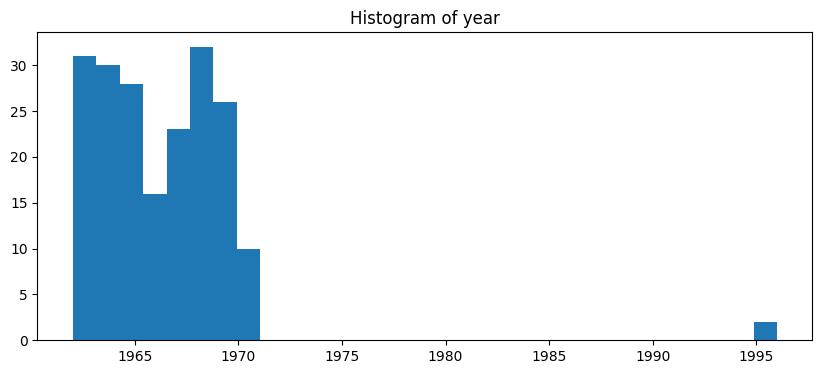

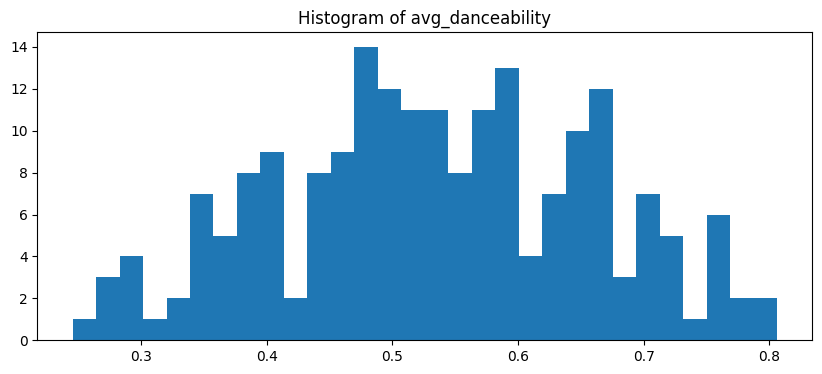

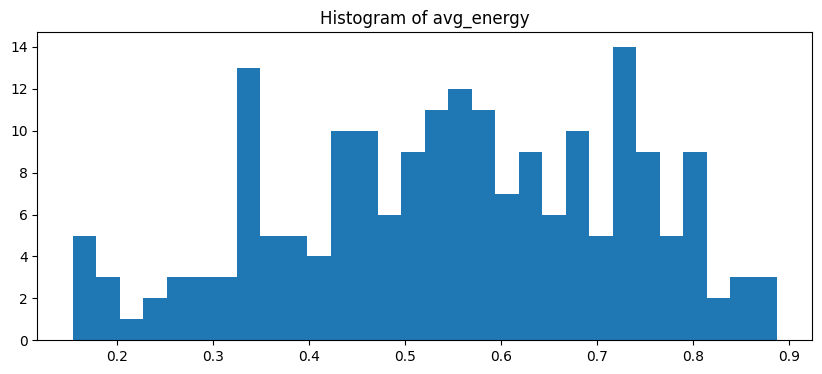

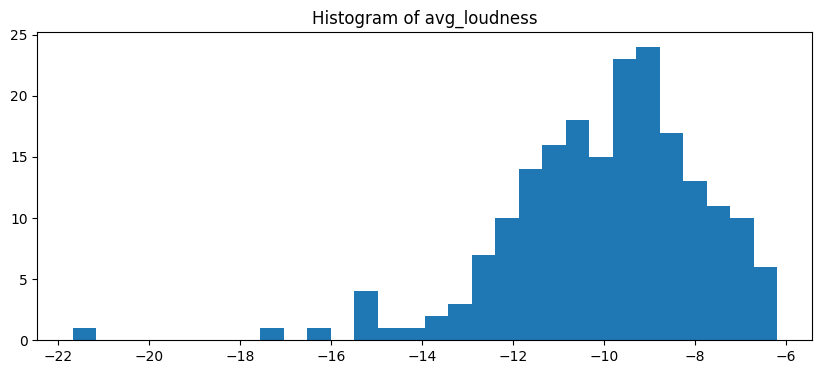

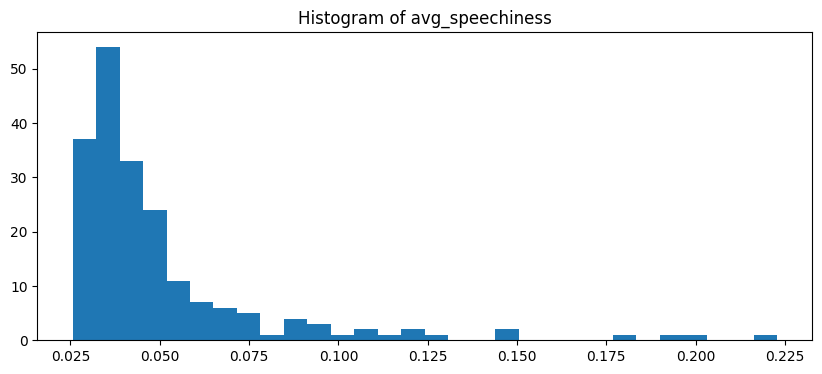

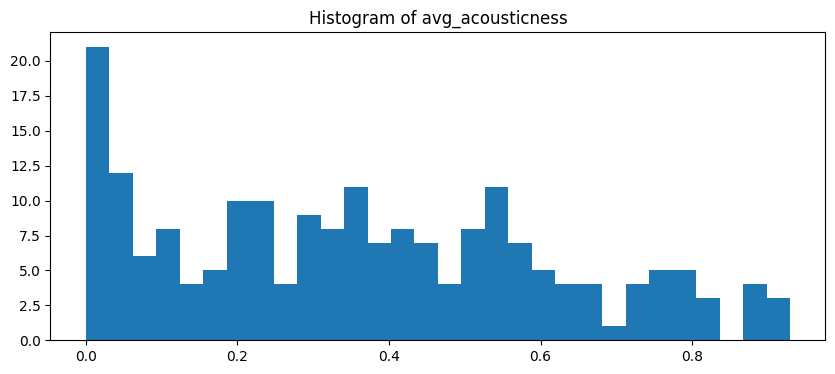

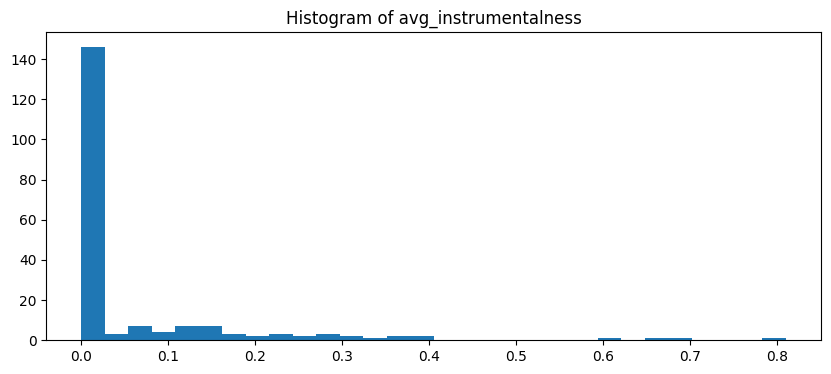

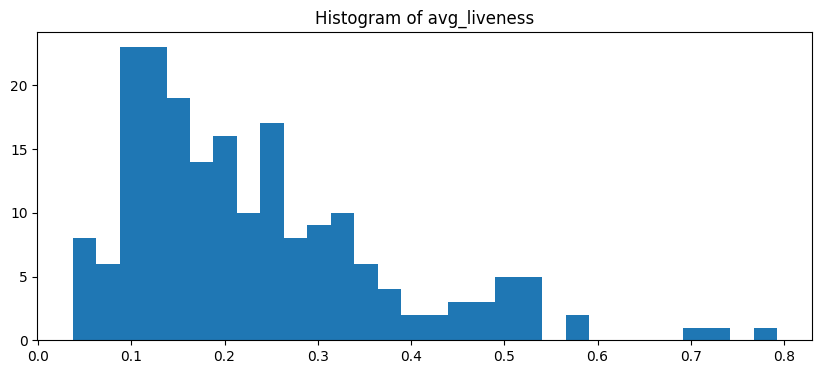

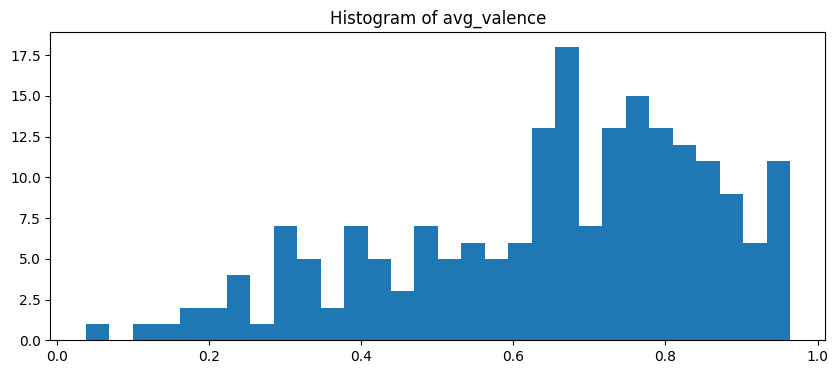

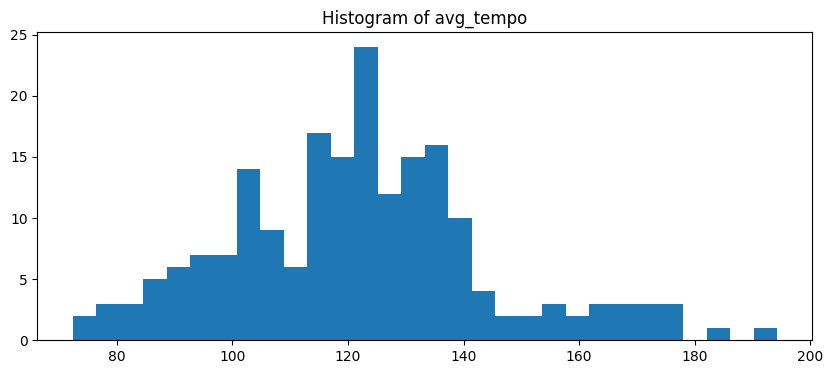

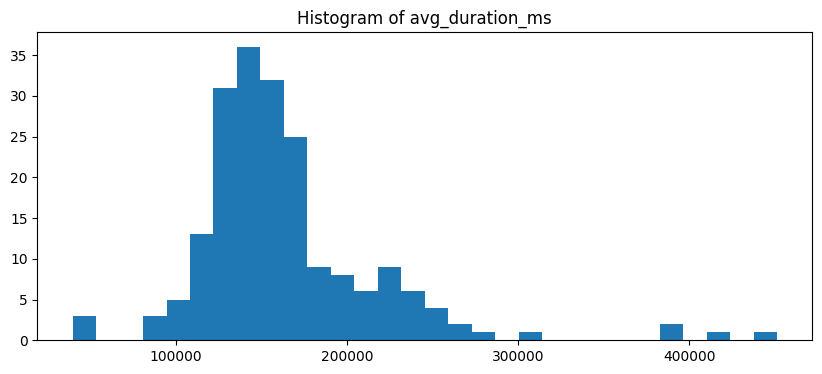

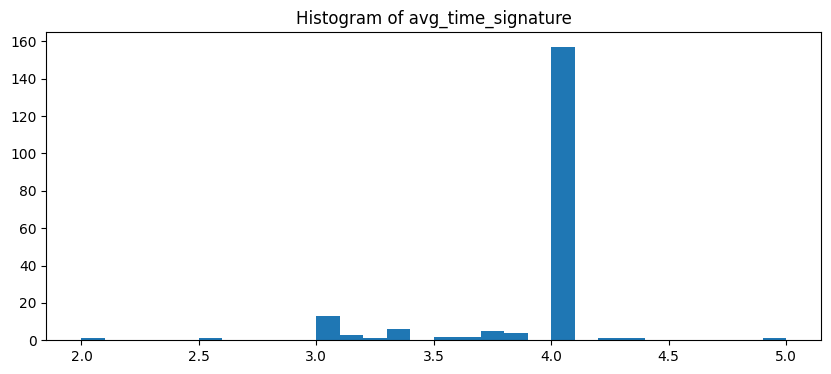

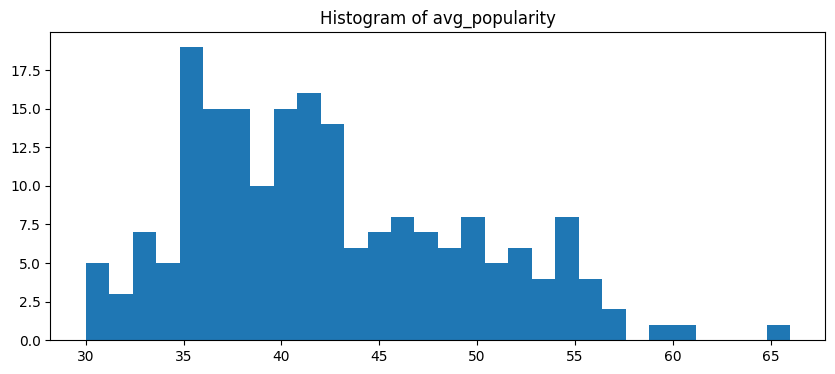

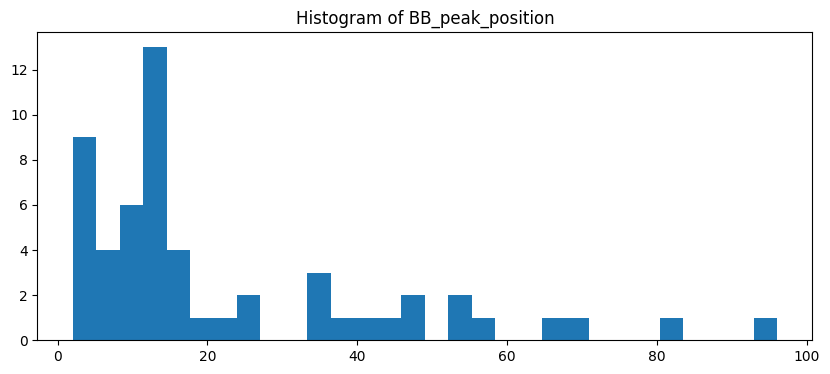

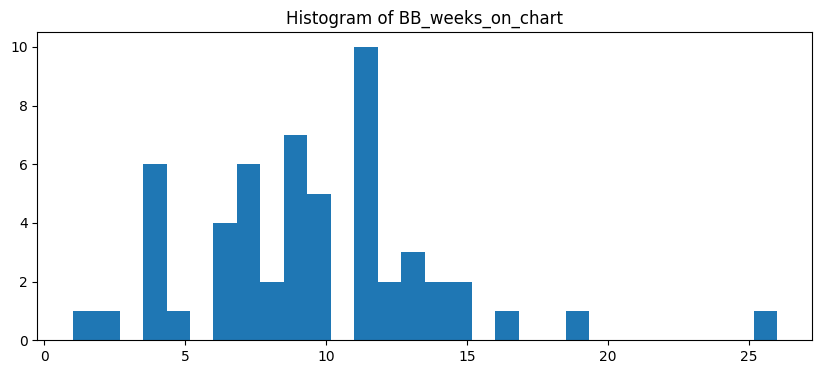

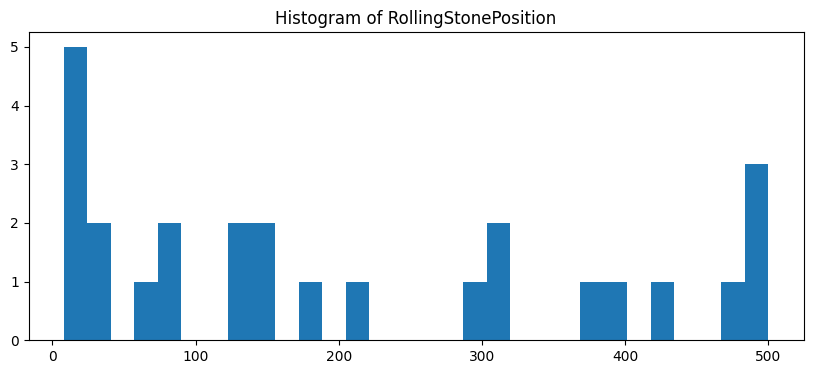

In [13]:
##Stem:  Numeric Variable Analysis    

df['year']=df['year'].astype(int)

for col in ['year', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_tempo', 'avg_duration_ms', 'avg_time_signature', 'avg_popularity', 'BB_peak_position', 'BB_weeks_on_chart', 'RollingStonePosition']:
    plt.figure(figsize=(10,4))
    plt.hist(df[col].dropna(), bins=30)  # dropna to avoid error if there are NaNs
    plt.title(f'Histogram of {col}')
    plt.show()

    



In [14]:
df.dtypes

song                               object
core_catalogue_releases            object
songwriters                        object
lead_vocals                        object
year                                int32
SongKey                            object
first_release_date         datetime64[ns]
max_key                           float64
mode                              float64
avg_danceability                  float64
avg_energy                        float64
avg_loudness                      float64
avg_speechiness                   float64
avg_acousticness                  float64
avg_instrumentalness              float64
avg_liveness                      float64
avg_valence                       float64
avg_tempo                         float64
avg_duration_ms                   float64
avg_time_signature                float64
Song_y                             object
lyrics                             object
avg_popularity                    float64
BB_name                           

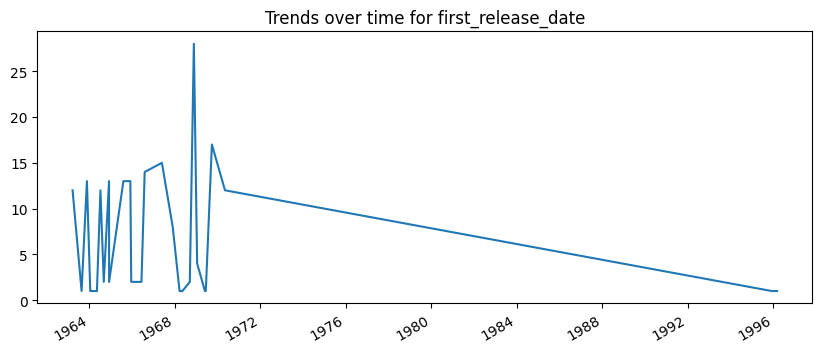

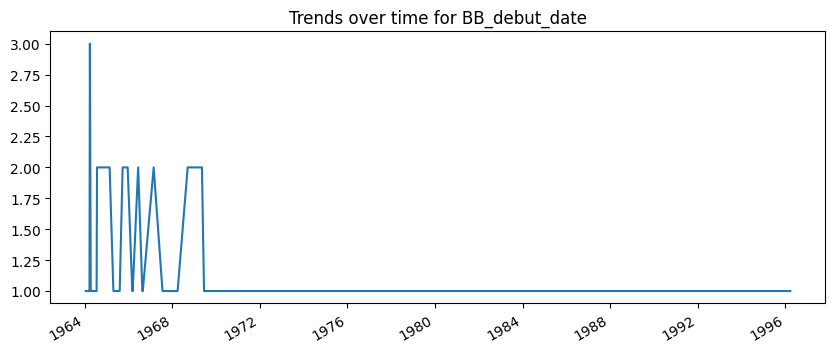

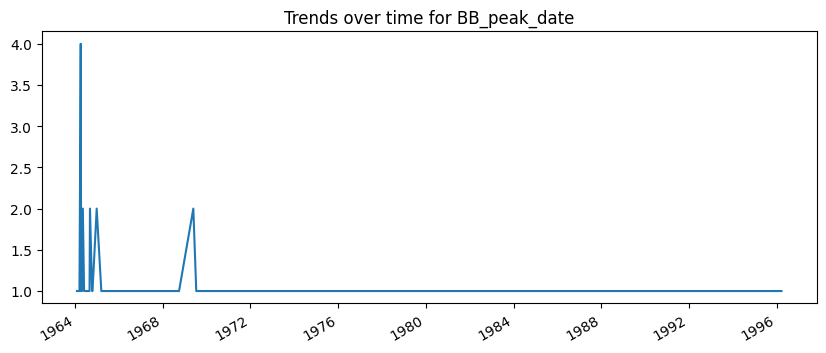

In [15]:
##stem: temporal variable analysis



for col in ['first_release_date', 'BB_debut_date', 'BB_peak_date']:
    df[col] = pd.to_datetime(df[col])
    plt.figure(figsize=(10,4))
    df[col].value_counts().sort_index().plot()
    plt.title(f'Trends over time for {col}')
    plt.show()

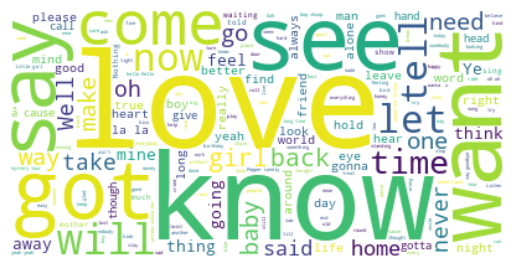

In [16]:
##stem: text variable analysis
from wordcloud import WordCloud

text = " ".join(lyrics for lyrics in df.lyrics.dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df.dtypes

song                               object
core_catalogue_releases            object
songwriters                        object
lead_vocals                        object
year                                int32
SongKey                            object
first_release_date         datetime64[ns]
max_key                           float64
mode                              float64
avg_danceability                  float64
avg_energy                        float64
avg_loudness                      float64
avg_speechiness                   float64
avg_acousticness                  float64
avg_instrumentalness              float64
avg_liveness                      float64
avg_valence                       float64
avg_tempo                         float64
avg_duration_ms                   float64
avg_time_signature                float64
Song_y                             object
lyrics                             object
avg_popularity                    float64
BB_name                           

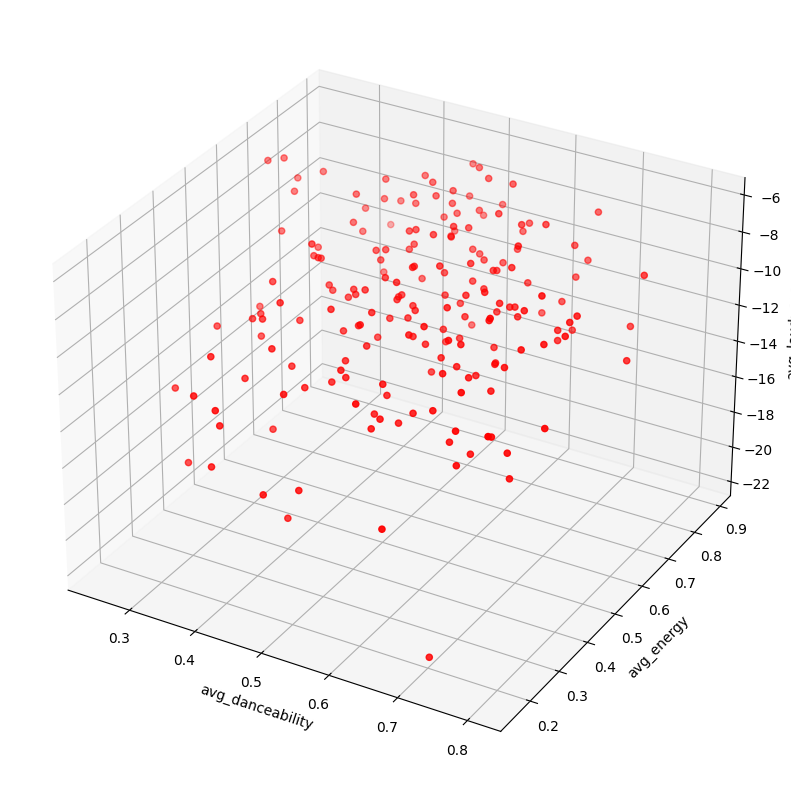

In [18]:
##stem: 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['avg_danceability'], df['avg_energy'], df['avg_loudness'], c='r', marker='o')
ax.set_xlabel('avg_danceability')
ax.set_ylabel('avg_energy')
ax.set_zlabel('avg_loudness')
plt.show()





In [19]:
##stem: do some groupings   
print(df.groupby('songwriters')['avg_popularity'].mean())
print(df.groupby('year')['avg_loudness'].max())


songwriters
Arthur Alexander †                                       38.000000
Berry Gordy Janie Bradford †                             35.000000
Bobby Scott Ric Marlow †                                 38.500000
Buddy Holly †                                            40.500000
Burt Bacharach Mack David Luther Dixon †                 44.000000
Carl Perkins †                                           33.750000
Chuck Berry †                                            33.800000
Gerry Goffin Carole King †                               37.500000
Harrison                                                 42.222827
Johnny Russell Voni Morrison †                           51.000000
Larry Williams †                                         30.500000
Lennon                                                   53.000000
Lennon McCartney                                         42.940047
Lennon McCartney Harrison Starkey                        45.166667
Lennon McCartney Starkey                          

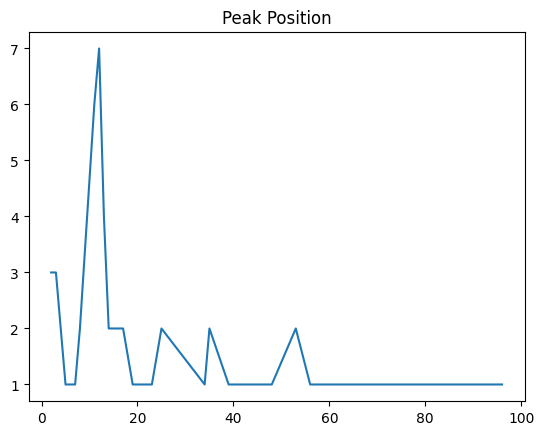

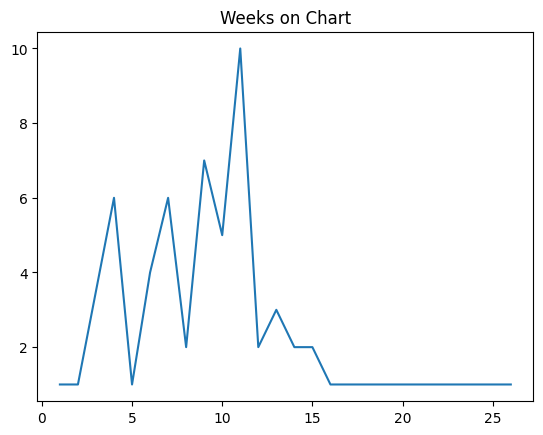

In [20]:
##stem: compare rankings


df['BB_peak_position'].value_counts()
df['BB_peak_position'].value_counts().sort_index().plot()
plt.title('Peak Position')
plt.show()



df['BB_weeks_on_chart'].value_counts()
df['BB_weeks_on_chart'].value_counts().sort_index().plot()
plt.title('Weeks on Chart')
plt.show()


In [21]:
sorted_df = df[['year', 'Canonical_album', 'song']].sort_values(by=['year', 'Canonical_album', 'song'])
sorted_df


,year,Canonical_album,song
118,1962,Please Please Me,Love Me Do
173,1963,Please Please Me,A Taste of Honey
8,1963,Please Please Me,Anna (Go to Him)
11,1963,Please Please Me,Ask Me Why
12,1963,Please Please Me,Baby It's You
...,...,...,...
142,1970,Let It Be,One After 909
115,1970,Let It Be,The Long and Winding Road
186,1970,Let It Be,Two of Us
214,1995,Anthology 1,Free as a Bird


In [ ]:
# Set your OpenAI API key as an environment variable
#os.environ["OPENAI_API_KEY"] = "foo"
#os.environ["OPENAI_API_ORG"] = "bar"


# Get your OpenAI API key from the environment variable
api_key = os.environ.get("OPENAI_API_KEY")
api_org = os.environ.get("OPENAI_API_ORG")

# Print the API key to verify that it was retrieved correctly
#print(api_key)